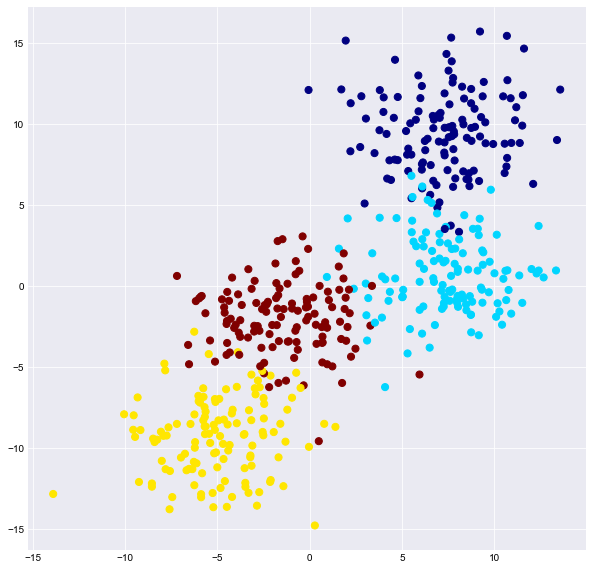

In [50]:
# [決定木とランダムフォレスト - Qiita](https://qiita.com/yshi12/items/6d30010b353b084b3749)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

# for create dummy data
from sklearn.datasets import make_blobs
# n_samples: sample nuber, centers: center points number, random_state: seed number, cluster_std: degree of variation
X, y = make_blobs(n_samples=500, centers=4, random_state=8, cluster_std=2.4)

plt.figure(figsize = (10, 10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

In [6]:
# visualize decision tree
def visualize_tree(classifier, X, y, boundaries=True, xlim=None, ylim=None):
    """decision tree visualize function
    INOUTS: classifier model, X, y, optional x/y limits
    OUTPUTS: visualize decision tree by using Meshgrid
    """
    classifier.fit(X, y)
    
    # auto adjustment for axis
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)
    
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    # make meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # execute prediction of classifier
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # reshape by meshgrid
    Z = Z.reshape(xx.shape)
    
    # coloring by classifier
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    
    # draw training data
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    def plot_boundaries(i, xlim, ylim):
        '''
        drawing boundary line
        '''
        if i < 0:
            return
        
        tree = classifier.tree_
        
        # call recursively for drawing boundary line
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i], [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i], [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim, [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim, [tree.threshold[i], ylim[1]])
    
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

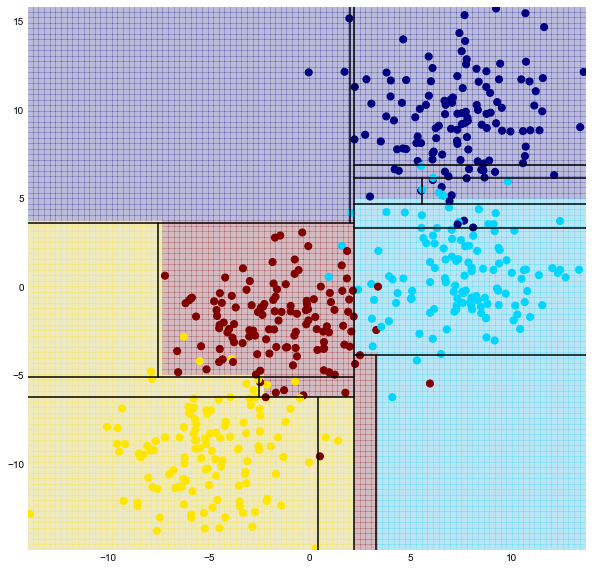

In [81]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=0)
visualize_tree(clf, X, y)

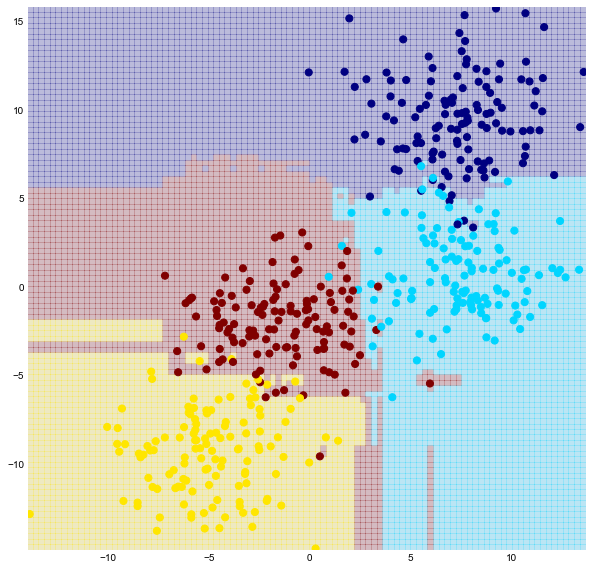

In [85]:
# random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_tree(clf, X, y, boundaries=False)

<Container object of 3 artists>

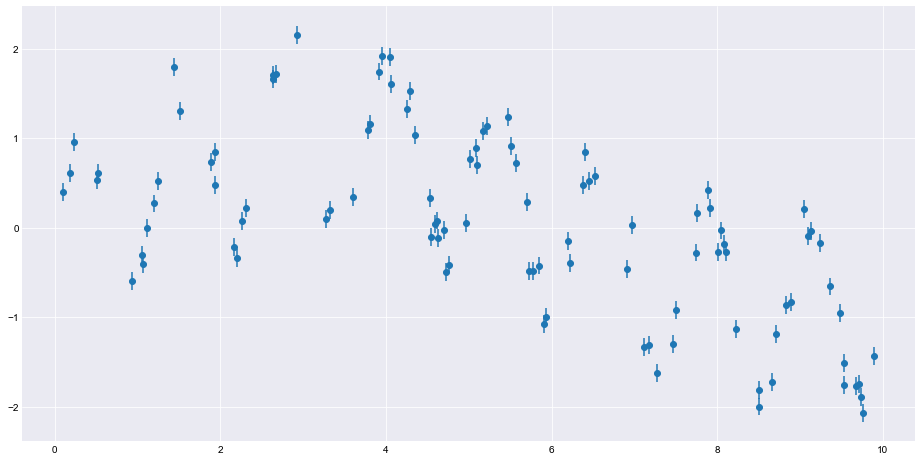

In [90]:
# Random Forest for Regression
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2):
    """large wave + small wave + dummy data from noize"""
    noise = sigma * np.random.randn(len(x))
    
    return np.sin(5 * x) + np.sin(0.5 * x) + noise

# calculate y from x
y = sin_model(x)

# plot
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

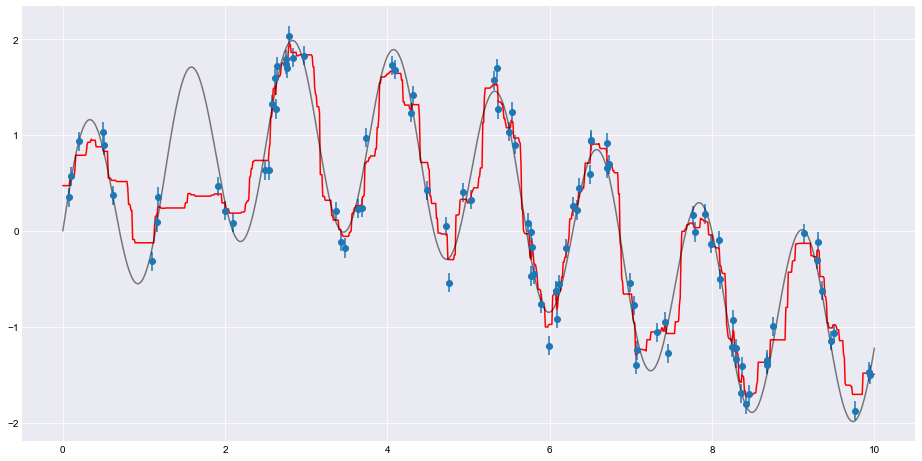

In [89]:
from sklearn.ensemble import RandomForestRegressor

# prepair 1000 data of 0 to 10 for confirmation
xfit = np.linspace(0, 10, 1000)

# execute random forest
rfr = RandomForestRegressor(100)
rfr.fit(x[:, None], y)
yfit = rfr.predict(xfit[:, None])

# get actual value for comparing result
ytrue = sin_model(xfit, 0)

# confirm result
plt.figure(figsize = (16, 8))
plt.errorbar(x, y, 0.1, fmt='o')
plt.plot(xfit, yfit, '-r')
plt.plot(xfit, ytrue, '-k', alpha=0.5)

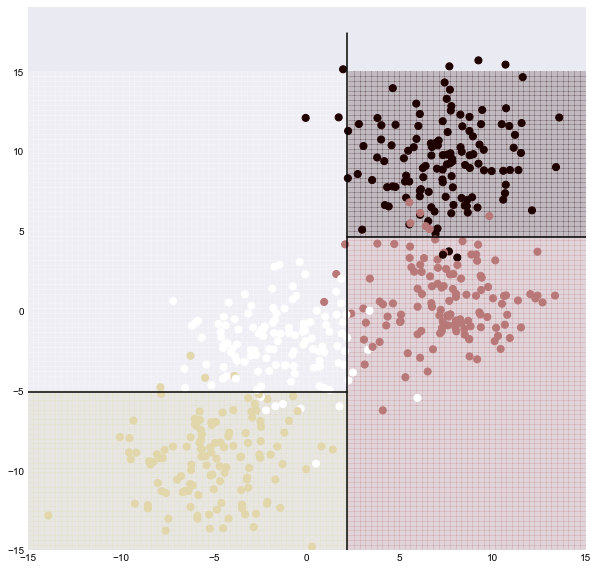

In [75]:
# visualization arange
xxx, yyy = np.meshgrid(np.linspace(-15, 15, 100), np.linspace(-15, 15, 100))
xlim2 = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
ylim2 = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

ZZ = clf.predict(np.c_[xxx.ravel(), yyy.ravel()])
ZZ = ZZ.reshape(xxx.shape)

plt.figure(figsize=(10,10))

# [color example code: colormaps_reference.py — Matplotlib 2.0.2 documentation](https://matplotlib.org/examples/color/colormaps_reference.html)
plt.pcolormesh(xxx, yyy, ZZ, alpha=0.2, cmap='pink')
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='pink')

def plot_boundaries2(i, xlim2, ylim2):
    if i < 0:
        return

    tree2 = clf.tree_
    
    if tree2.feature[i] == 0:
        plt.plot([tree2.threshold[i], tree2.threshold[i]], ylim2, '-k')
        plot_boundaries2(tree2.children_left[i], [xlim2[0], tree2.threshold[i]], ylim2)
        plot_boundaries2(tree2.children_right[i], [tree2.threshold[i], xlim2[1]], ylim2)
    elif tree2.feature[i] == 1:
        plt.plot(xlim2, [tree2.threshold[i], tree2.threshold[i]], '-k')
        plot_boundaries2(tree2.children_left[i], xlim2, [ylim2[0], tree2.threshold[i]])
        plot_boundaries2(tree2.children_right[i], xlim2, [tree2.threshold[i], ylim2[1]])
        
plot_boundaries2(0, plt.xlim(), plt.ylim())

In [67]:
xlim2

(-13.988136635256167, 13.676797377645679)